In [1]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
# 读取txt文件（根据实际路径修改）
file_path = "C:/Users/Saru/Desktop/TUAT/WRP/seminal/1015/Ob5.txt"

# 读取数据：无表头，用空格或制表符分隔
#df = pd.read_csv(file_path, sep=r"\s+", header=None)
df = pd.read_csv(file_path, sep=r",", header=None)

# 显示前3行
#print(df.head(1))


In [3]:
df.columns = ["id", "x", "z", "y", "t", "vx", "vz", "vy", "ax", "az", "ay"]

In [5]:
print(df.head(10))

   id        x        z         y     t       vx       vz      vy       ax  \
0   1  -57.204  -48.083    9.2882  0.06 -38.5000  -51.608 -179.45  1925.40   
1   1  -56.760  -48.610    8.0285  0.07 -18.6180  -52.625 -172.98  2869.90   
2   1  -56.582  -49.418    6.2214  0.08  -6.3378  -47.479 -179.50  1866.40   
3   1  -56.257  -49.853    4.6246  0.09  29.1460  -43.433 -188.73  2029.10   
4   2 -193.900 -168.950  167.1100  0.06 -41.3850 -196.370 -233.85  -820.34   
5   2 -194.100 -170.760  164.7700  0.07 -51.3560 -188.320 -224.60  -572.96   
6   2 -194.590 -172.860  162.6800  0.08 -58.2410 -177.510 -217.64  -793.79   
7   2 -195.260 -174.440  160.0900  0.09 -62.1310 -162.030 -211.24  -794.41   
8   2 -196.010 -175.970  158.5600  0.10 -72.6820 -147.790 -200.02  -661.06   
9   2 -196.890 -177.520  156.7200  0.11 -77.2390 -130.960 -194.20  -514.79   

        az       ay  
0  -422.75   937.77  
1   169.95   588.03  
2   729.47  -739.84  
3   748.82 -2727.60  
4   686.44   207.65  
5  1146.3

In [6]:
# 假设 df 已经读入，并有列名 id, x, z, y, t, vx, vz, vy, ax, az, ay
# Step 1: 找出每个时间点（或帧）中的独立个体数
swarm_size_per_frame = df.groupby("t")["id"].nunique()
# Step 2: 计算平均群体规模
mean_swarm_size = swarm_size_per_frame.mean()

print("Mean swarm size:", mean_swarm_size)

Mean swarm size: 22.33362305275122


In [61]:
df['id'].nunique()  # 总个体数
df.groupby('id')['t'].count().describe()  # 每只昆虫轨迹长度分布


count     639.000000
mean      522.760563
std      1150.833956
min         1.000000
25%        16.000000
50%        81.000000
75%       563.000000
max      9779.000000
Name: t, dtype: float64

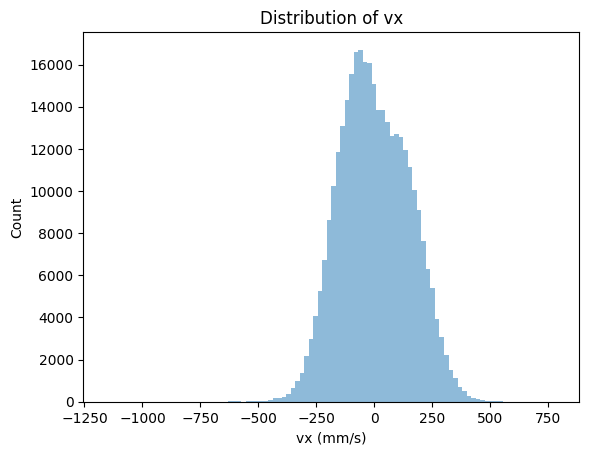

In [62]:
plt.hist(df['vx'], bins=100, alpha=0.5)
plt.title("Distribution of vx")
plt.xlabel("vx (mm/s)")
plt.ylabel("Count")
plt.show()


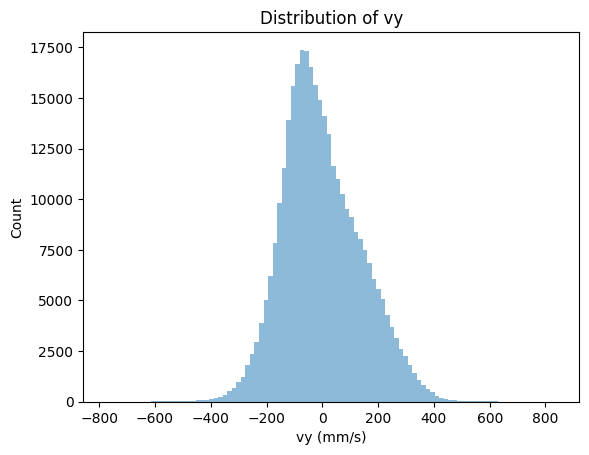

In [63]:
plt.hist(df['vy'], bins=100, alpha=0.5)
plt.title("Distribution of vy")
plt.xlabel("vy (mm/s)")
plt.ylabel("Count")
plt.show()

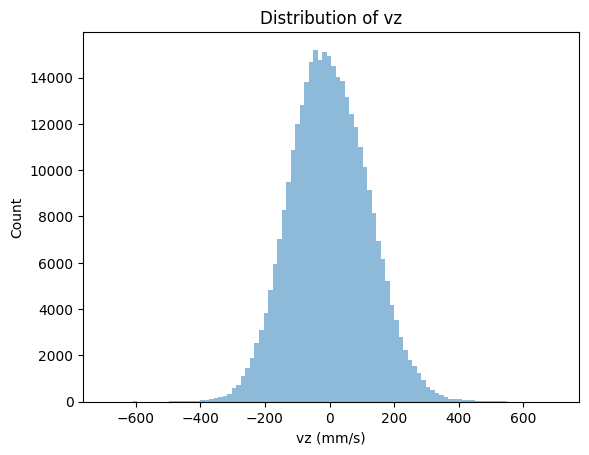

In [64]:
plt.hist(df['vz'], bins=100, alpha=0.5)
plt.title("Distribution of vz")
plt.xlabel("vz (mm/s)")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='t'>

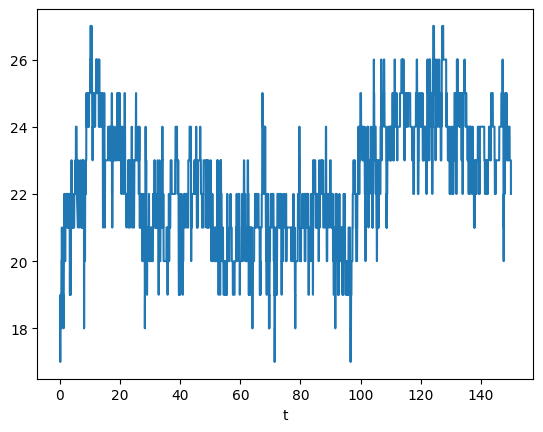

In [65]:
swarm_size = df.groupby('t')['id'].nunique()
swarm_size.plot()


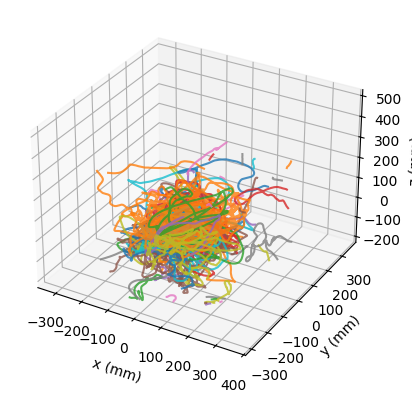

In [67]:
sample_ids = df['id'].unique()[:100]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in sample_ids:
    traj = df[df['id']==i]
    ax.plot(traj['x'], traj['y'], traj['z'], alpha=0.8)

ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_zlabel('z (mm)')
plt.show()
